<div style="text-align: center;font-size: 30px;"><b>Support Vector Machine</b></div>
<div style="text-align: center;font-size: 30px;"><b>Maszyna Wektorów Nośnych</b></div>
<div style="text-align: center;font-size: 30px;"><b>SVM</b></div>

Tagi: <b>Uczenie maszynowe, klasyfikacja, regresja.</b>

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.svm import SVC

<h1>1.Motywacja.</h1>

Na poprzednich zajęciach wielokrotnie stawaliśmy przed zadaniem klasyfikacji binarnej, to jest podziału zbioru danych na dwie grupy.

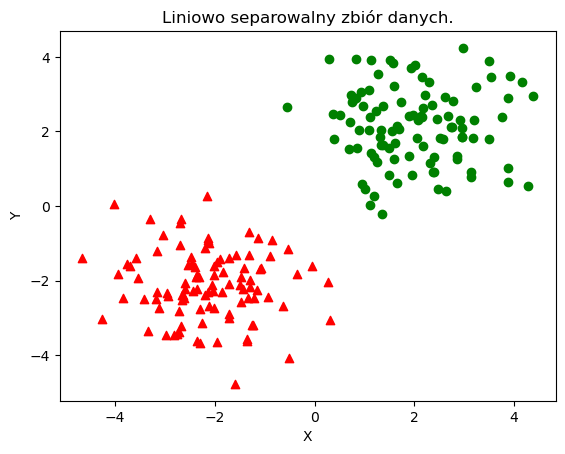

In [38]:
exec(plot1)

Zwróćmy uwagę, że zbiór może zostać przez nas podzilony różnymi separatorami, np w następujące sposoby:

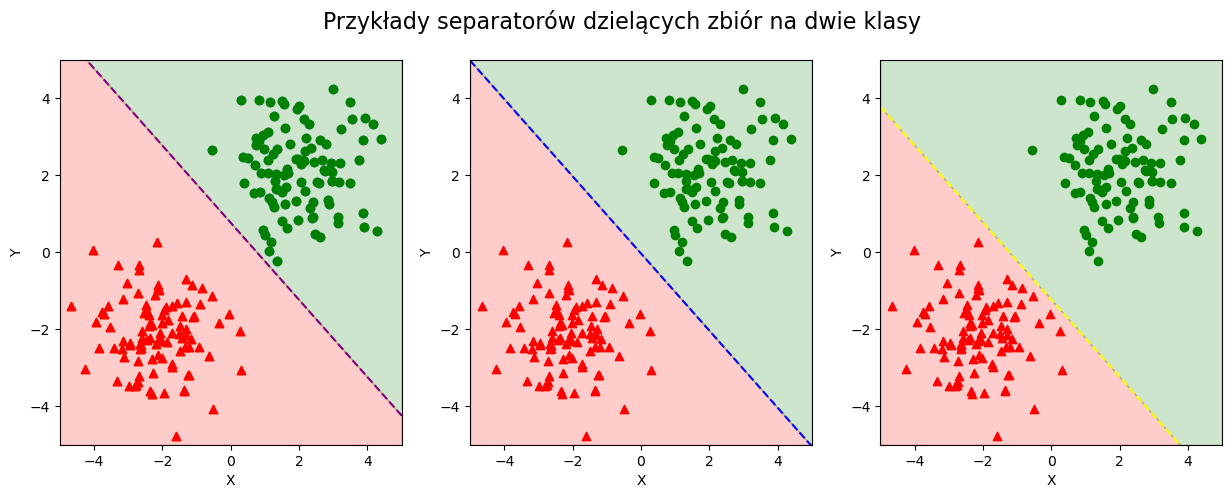

In [93]:
exec(plot2)

Motywacją do stworzenia Support Vector Machine jest to, że wybrany separator ma wpływ na skuteczność modelu i nie powinien on być wybierany losowo. Zamiast tego postulowane jest wybranie takiej granicy decyzyjnej, aby jej odległość od najbliższego punktu z każdego zbioru była największa.

<h1>2. Informacje teoretyczne.</h1>

<h3>Definicje pomocne przy rozmowie o SVM</h3> to:
<ul>
    <li>Hiperplan - hiperpłaszczyzna, podprzestrzeń rodzielająca zbiór na klasy.</li>
    <li>Wektory nośne (polska nazwa na SVM, to Maszyna Wektorów Nośnych) - punktu z klas znajdujące się najbliżej hiperplanu.</li>
    <li>Margines - odległość od hiperplanu do wektora nośnego.</li>
</ul>

Na rysunky wszystko wygląda tak:

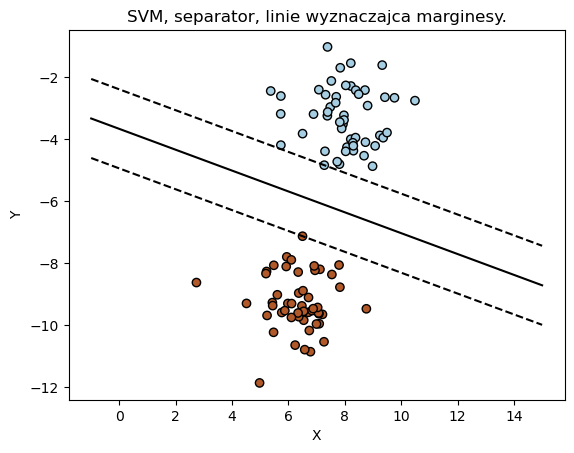

In [218]:
exec(plot3)

<h3>Hiperplany</h3>

Dowolny hiperplan może zostać zapisany jako:

\begin{equation}
w_1x_1 +w_2x_2 + \ldots w_nx_n = b
\end{equation}

gdzie $w_1, w_2, \ldots ,w_n$ to współczynniki, a $x_1, x_2, \ldots x_n$ to współrzedne punktów spełniających równanie.

My natomiast - dla wygody - będziemy używali notacji wektorowej. Wówczas powyższe równanie przybierze formę:

\begin{equation}
w^Tx = b
\end{equation}

Wspomniane już zostało, że idea Support Vector Machine opiera się na znalezieniu takiego hiperplanu, aby był od możliwie odległy od obu wektorów nośnych zbiorów. Problem ten można rozwiązać tak, że znajdujemy hiperpowierzchnie przechodzące przez wektory nośne, tak aby ich odległośc od siebie była możliwie duża i wtedy hiperplan leżący dokładnie w połowie odległości między nimi jest szukanym separatorem.

Dla zbioru który jest unormowany, wspomniane hiperpowierzhcnie są zadane zależnościami:
\begin{equation}
w^Tx-b = 1  \text{, to co nad jest w klasie}
\end{equation}
oraz
\begin{equation}
w^Tx-b = -1 \text{, to co pod jest w klasie}
\end{equation}

Można udowodnić <a href="https://math.stackexchange.com/questions/1305925/why-is-the-svm-margin-equal-to-frac2-mathbfw"><span style="color: blue;">(LINK)</span></a>, że odlgełosc pomiędzy tak zadanymi hiperplanami zostanie wyrażona jako $\frac{2}{||w||}$. Tym samym, jeżeli szukamy największej odległości między nimi, to należy zminimalizować wartość $||w||$.

<h3>Hinge loss</h3>

Powyższy scenariusz jest wystarczający dla sytuacji w których dane są liniowo separowalne. Gdy tak nie jest, dobrze jest się wspomóc funkcją Hinge loss, czyli funkcja kosztu dla Maszyny Wektorów Nośnych. Tłumacząc bezpośrednio byłoby to Zawiasowa Funkcja Straty. Jej wzór wygląda następująco:

\begin{equation}
\texttt{H}(y_i,f(x^i)) = \texttt{max}(0, 1 - y_i\cdot f(x^i))
\end{equation}

gdzie (dla przypomnienia) $f(x^i) = w^Tx^i -b$, a $y_i$ może przyjąć jedynie wartości -1 i 1.

Natomiast jej wykres:

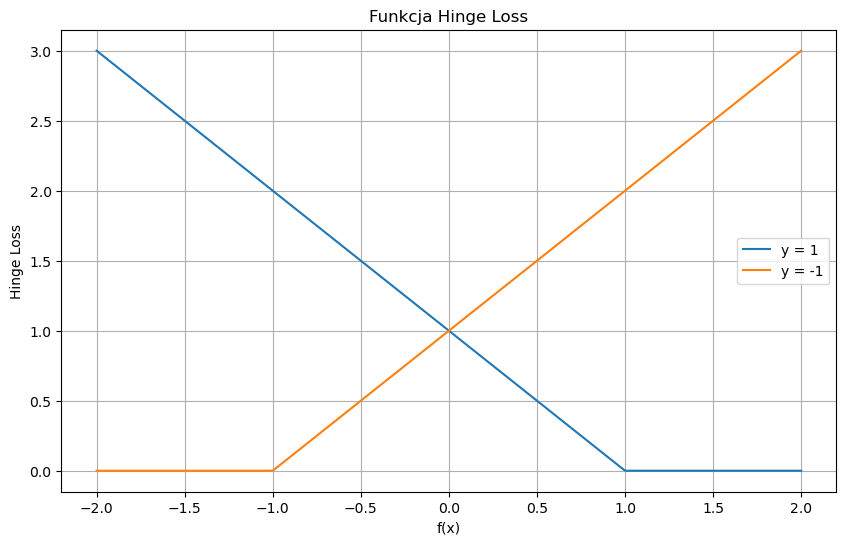

In [211]:
# y przyjmuje albo 1, albo -1 i jest to znana wartość którą oczekujemy otrzymać po aplikacji do modelu x
# f_x to wartość jaką zwraca model po aplikacji do niego x
def hinge_loss(y: int,f_x: int) -> int:
    return np.maximum(0, 1 - y * f_x)
exec(plot4)

Funkcja kosztu dla ogólnego przypadku SVM, jest tworzona poprzez dodanie do funkcji zawiasowej terminu regularyzacyjnego związanego z wagami. Wóczas funkcja kosztu prezentuje się jako:

$$J(w, b) = \lambda \|w\|^2 + C \sum_{i=1}^{N}\texttt{H}(y_i,f(x^i))$$

Gdzie C, $\lambda$ to hiperparametry, a sumowanie przechodzi po wszystkich punktach zbioru

<h3>Gdy dane nie są liniowo separowalne - Kernel Trick - rozszerszenie przestrzeni cech.</h3>
W sytuacjach, gdy zmagamy danymi które nie są separowalne liniowo, możemy sztucznie dodać nie nich kolejne wymiary, a może okazać się, że wówczas uda się nam je rozseparować. Dla przykładu: 

Niehc $\mathbb{X} = X_{-} + X_+$ gdzie $X_{-} = \{x \in \mathbb{R}^2: ||x||< 1\}$ i $X_{+} = \{x \in \mathbb{R}^2: ||x||> 1\}$. Zbioru $\mathbb{X}$ nie da się rozseparować w $\mathbb{R}^2$. Natomiast bo dodaniu dodatkowej cechy, równej $||x||$, zanurzymy go do $\mathbb{R}^3$. Każdy punkt będzie miał teraz współrzedne $\{x_1,x_2,\sqrt{x_1^2+x_2^2}\}$, a separatorem będzie hiperplan o równianiu $z = 1$

Barierę dla stosowania zanurzenia stanowi moc obliczeniowa

Najbardziej popularne funkcje typu kernel, to:
<ul>
    <li>Kernel liniowy, czyl po prostu iloczyn skalarny $K(x,y) = g(x,y) = x^Ty $.</li>
    <li>Kernel wielomianowy, czyli po prostu iloczyn skalarny plus wyraz wolny k, w potędze $d$: $K(x, y) = (g(x, y)+k)^d$.</li>
    <li>Kernel radialny/ Radial Basis Function Kernel/ RBF kernel: $$ K(x,y) = \texttt{exp}\Bigl({-\frac{||x - y||^2}{2\sigma^2}}\Bigl)$$ gdzie $\sigma$ to parametr</li>
</ul>

<h1>3. Zadania.</h1>

<b>Zadanie 1.</b> Czy we wzorze na funkcje kosztu: $$J(w, b) = \lambda \|w\|^2 + C \sum_{i=1}^{N}\texttt{H}(y_i,f(x^i))$$ parametr $C$ może być ujemny?

<b>Zadanie 2.</b> Przeanalizuj zachowanie Hinge loss: $$\texttt{H}(y_i,f(x^i)) = \texttt{max}(0, 1 - y_i\cdot f(x^i)) = \texttt{max}(0,1 - y_i(w^Tx^i-b))$$dla następującyh par cech i etykie:

| $y_i$      | $x_i$        | Hinge lose | Znaczenie wyniku|
|------------|--------------|------------|-----------------|
| $y_1 = 1$  | $f(x^1) >0$  |            |                 |
| $y_2 = 1$  | $f(x^2) <=0$ |            |                 |
| $y_3 = -1$ | $f(x^3) >0$  |            |                 |
| $y_4 = -1$ | $f(x^4) <=0$ |            |                 |

<b>Zadanie 3.</b> Ile wynosi gradient dla funkcji Hinge loss?

<b>Zadanie 4.</b> Do poniższej klasy dopisz funkcję fit, tak aby klasa rzeczywiście reprezentowałą SVM.

In [177]:
class SVM:
    def __init__(self, learning_rate: float = 0.1, lambda_param: float = 0.01, C: float = 1.0, epochs: int = 1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.C = C
        self.epochs = epochs
        self.biases = None
        self.weights = None

    def fit(self, X: np.array, y: np.array) -> None:
        pass
        
    def hinge_loss(self, y: int, x: float) -> float:
        pass
    
    def feed(self, x: np.array) -> float:
        return (np.dot(x,self.weights) -self.biases)
        
    
    def predict(self, X: np.array):
        return np.sign(self.feed(X))
        
    def accuracy(self, X: np.array, y: np.array) -> float:
        correct_predictions = 0
        for i,j in zip(y,self.predict(X)):
            if i == j:
                correct_predictions += 1
        return correct_predictions/len(X)
    
#funkcje do testowania modelu
def test_svm_separable(model: SVM) -> None:
    X, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.05, random_state=40)
    y = np.where(y == 0, -1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
    model.fit(X_train, y_train)
    acc = model.accuracy(X_test,y_test)
    print(acc)

def test_svm_nonseparable(model: SVM) -> None:
    X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, class_sep=1.0, random_state=42)
    y = np.where(y == 0, -1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
    model.fit(X_train, y_train)
    acc = model.accuracy(X_test,y_test)
    print(acc)

In [175]:
##Miejsce do testowania modelu
model =SVM()
test_svm_separable(model)
model2 =SVM()
test_svm_nonseparable(model2)

1.0
0.85


<b>Zadanie 5 .</b>Microsoft Copilot proponuje następującą funkcje stowrzoną do kernelizacji przestrzeni cech:

In [187]:
def compute_kernel(self, X1: np.array, X2: np.array ,kernel_type: str, params: dict):
    if kernel_type == 'linear':
        return np.dot(X1, X2.T)
    elif kernel_type == 'polynomial':
        return (np.dot(X1, X2.T) + 1) ** params['degree']
    elif kernel_type == 'rbf':
        sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
        return np.exp(-self.gamma * sq_dists)
    else:
        raise ValueError(f"Unknown kernel: {self.kernel}")
SVM.compute_kernel = compute_kernel


Spróbuj z jej wykorzystaniem dokonać klasyfikacji nieseparowalnych danych wygenerwoanych przy pomocy:

In [198]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

Czyli pracujemy na zbiorze punktów ułożonych w koło.

In [203]:
#miejsce na kod

<h1>4. Kod źródłowy używany w notebooku.</h1>

In [209]:
plot1 = '''
np.random.seed(0)
class_1 = np.random.randn(100, 2) + np.array([2, 2])
class_2 = np.random.randn(100, 2) + np.array([-2, -2])
plt.scatter(class_1[:, 0], class_1[:, 1], marker='o', color = 'green' )
plt.scatter(class_2[:, 0], class_2[:, 1], marker='^',color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Liniowo separowalny zbiór danych.')
plt.show()

'''
plot2 = '''
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

np.random.seed(0)
class_1 = np.random.randn(100, 2) + np.array([2, 2])
class_2 = np.random.randn(100, 2) + np.array([-2, -2])
axs[0].scatter(class_1[:, 0], class_1[:, 1], marker='o' )
axs[0].scatter(class_2[:, 0], class_2[:, 1], marker='^')

X = np.vstack((class_1, class_2))
y = np.hstack((np.ones(100), np.zeros(100)))
perceptron = Perceptron()
perceptron.fit(X, y)

coef = perceptron.coef_[0]
intercept = perceptron.intercept_

x_values = np.linspace(-5, 5, 100)
y_values_1 = -(coef[0] / coef[1]) * x_values - (intercept / coef[1]) 
y_values_2 = -(coef[0] / coef[1]) * x_values - (intercept / coef[1]) - 0.8
y_values_3 = -(coef[0] / coef[1]) * x_values - (intercept / coef[1]) - 2


axs[0].scatter(class_1[:, 0], class_1[:, 1], marker='o', color = 'green')
axs[0].scatter(class_2[:, 0], class_2[:, 1], marker='^', color='red')
axs[0].plot(x_values, y_values_1, label='Separating Line', color='purple',linestyle='dashed')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

axs[0].fill_between(x_values, y_values_1, y2=-5, color='red', alpha=0.2)
axs[0].fill_between(x_values, y_values_1, y2=5, color='green', alpha=0.2)

axs[0].set_xlim(-5, 5)
axs[0].set_ylim(-5, 5)

axs[1].scatter(class_1[:, 0], class_1[:, 1], marker='o', color = 'green' )
axs[1].scatter(class_2[:, 0], class_2[:, 1], marker='^',color='red')
axs[1].plot(x_values, y_values_2, label='Separating Line', color='blue',linestyle='dashed')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].fill_between(x_values, y_values_2, y2=-5, color='red', alpha=0.2)
axs[1].fill_between(x_values, y_values_2, y2=5, color='green', alpha=0.2)

axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)

axs[2].scatter(class_1[:, 0], class_1[:, 1], marker='o', color = 'green' )
axs[2].scatter(class_2[:, 0], class_2[:, 1], marker='^',color='red')
axs[2].plot(x_values, y_values_3, label='Separating Line', color='yellow',linestyle='dashed')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].fill_between(x_values, y_values_3, y2=-5, color='red', alpha=0.2)
axs[2].fill_between(x_values, y_values_3, y2=5, color='green', alpha=0.2)

axs[2].set_xlim(-5, 5)
axs[2].set_ylim(-5, 5)

fig.suptitle('Przykłady separatorów dzielących zbiór na dwie klasy', fontsize=16)

plt.show()

'''
plot3 = '''
# Generate a linearly separable dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)

# Train an SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 15)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the margins
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.title('SVM, separator, linie wyznaczajca marginesy.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

'''


plot4 = '''

f_x_values = np.linspace(-2, 2, 400)
hinge_loss_y1 = hinge_loss(1, f_x_values)
hinge_loss_y_minus1 = hinge_loss(-1, f_x_values)
plt.figure(figsize=(10, 6))
plt.plot(f_x_values, hinge_loss_y1, label='y = 1')
plt.plot(f_x_values, hinge_loss_y_minus1, label='y = -1')
plt.xlabel('f(x)')
plt.ylabel('Hinge Loss')
plt.title('Funkcja Hinge Loss')
plt.legend()
plt.grid(True)
plt.show()

'''